In [1]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. ALS

In [2]:
regs = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
ranks = [5, 10, 20, 50]

## 1.1 Small

In [3]:
Map_als_small = [[0.010975701621193448, 0.012252236194578442, 0.004330176480749486, 0.0036544840199898474, 0.009337198528941335], [0.004938419752285299, 0.004938419752285299, 0.004603725874734278, 0.0034285714285714284, 0.004734987968848483], [0.0033333333333333335, 0.0033333333333333335, 0.0033333333333333335, 0.0034848484848484847, 0.008439336352870188], [6.944444444444444e-05, 6.944444444444444e-05, 6.944444444444444e-05, 6.944444444444444e-05, 0.009377874010490034]]
Precision_als_small = [[0.04666666666666667, 0.049999999999999996, 0.036666666666666674, 0.03666666666666667, 0.05000000000000001], [0.030000000000000002, 0.03, 0.02666666666666667, 0.006666666666666667, 0.023333333333333334], [0.0033333333333333335, 0.0033333333333333335, 0.0033333333333333335, 0.006666666666666667, 0.03], [0.0033333333333333335, 0.0033333333333333335, 0.0033333333333333335, 0.0033333333333333335, 0.03666666666666667]]
NDCG_als_small = [[0.0642049350602004, 0.06676189346268986, 0.0383288055196297, 0.037354996171844235, 0.06355140864575344], [0.04095626635578445, 0.04095626635578445, 0.03756945390669247, 0.01899876088574406, 0.03536288701969229], [0.015919507753606666, 0.015919507753606666, 0.015919507753606666, 0.018818257496975806, 0.05381893670753709], [0.0028353215385282897, 0.0028353215385282897, 0.0028353215385282897, 0.0028353215385282897, 0.06074668079825348]]
Time_als_small = [[16.76038384437561, 72.61697363853455, 15.036090850830078, 10.277924060821533, 9.653090476989746], [11.175248146057129, 12.739938974380493, 11.274507999420166, 9.078178882598877, 81.88284969329834], [10.38665246963501, 10.185670614242554, 11.341841459274292, 12.000884056091309, 14.347305297851562], [17.387662172317505, 16.417531967163086, 96.47444462776184, 12.373949527740479, 16.00629496574402]]


In [4]:
als_small_result = []
for rank in range(len(ranks)):
  for reg in range(len(regs)):
    temp_lst = []
    temp_lst = [ranks[rank], regs[reg], Map_als_small[rank][reg], Precision_als_small[rank][reg], 
                NDCG_als_small[rank][reg], Time_als_small[rank][reg]]
    als_small_result.append(temp_lst)

df_als_small = pd.DataFrame(als_small_result)
df_als_small = df_als_small.rename(columns={0: "rank", 1: "reg", 2: "Map", 
                                            3: "Precision", 4: "NDCG", 5: "Time"})
df_als_small

,rank,reg,Map,Precision,NDCG,Time
0,5,0.000001,0.010976,0.046667,0.064205,16.760384
1,5,0.000010,0.012252,0.050000,0.066762,72.616974
2,5,0.000100,0.004330,0.036667,0.038329,15.036091
3,5,0.001000,0.003654,0.036667,0.037355,10.277924
4,5,0.010000,0.009337,0.050000,0.063551,9.653090
5,10,0.000001,0.004938,0.030000,0.040956,11.175248
6,10,0.000010,0.004938,0.030000,0.040956,12.739939
7,10,0.000100,0.004604,0.026667,0.037569,11.274508
8,10,0.001000,0.003429,0.006667,0.018999,9.078179
9,10,0.010000,0.004735,0.023333,0.035363,81.882850


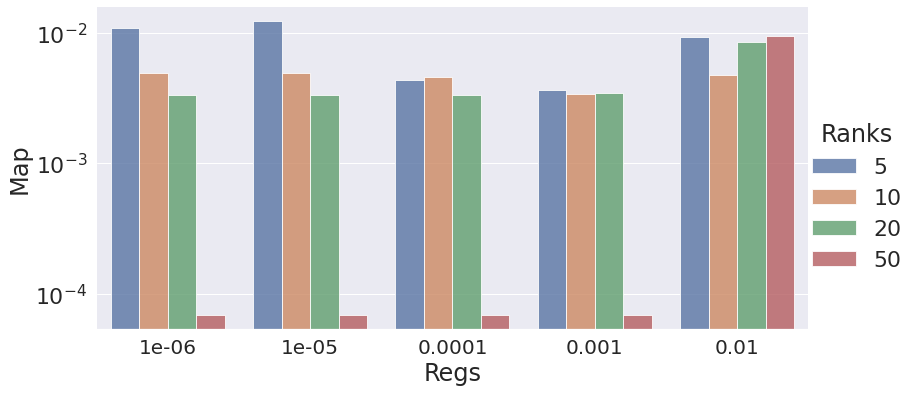

In [5]:
sns.set_theme(style="whitegrid")
sns.set(font_scale=2)

als_small_plt = sns.catplot(data=df_als_small, x='reg', y='Map', hue='rank', 
                                alpha=.8, kind='bar', height=6, legend_out=True, aspect=2);

als_small_plt.despine(left=True)
als_small_plt.set_axis_labels("Regs", "Map")
als_small_plt.legend.set_title("Ranks")
als_small_plt.set(yscale='log')
als_small_plt.set_xticklabels(fontsize=20)

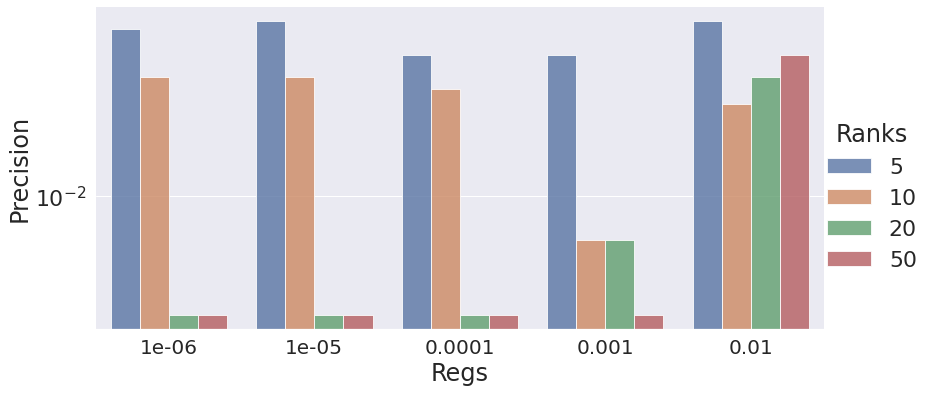

In [6]:
sns.set_theme(style="whitegrid")
sns.set(font_scale=2)

als_small_plt = sns.catplot(data=df_als_small, x='reg', y='Precision', hue='rank', 
                                alpha=.8, kind='bar', height=6, legend_out=True, aspect=2);

als_small_plt.despine(left=True)
als_small_plt.set_axis_labels("Regs", "Precision")
als_small_plt.legend.set_title("Ranks")
als_small_plt.set(yscale='log')
als_small_plt.set_xticklabels(fontsize=20)

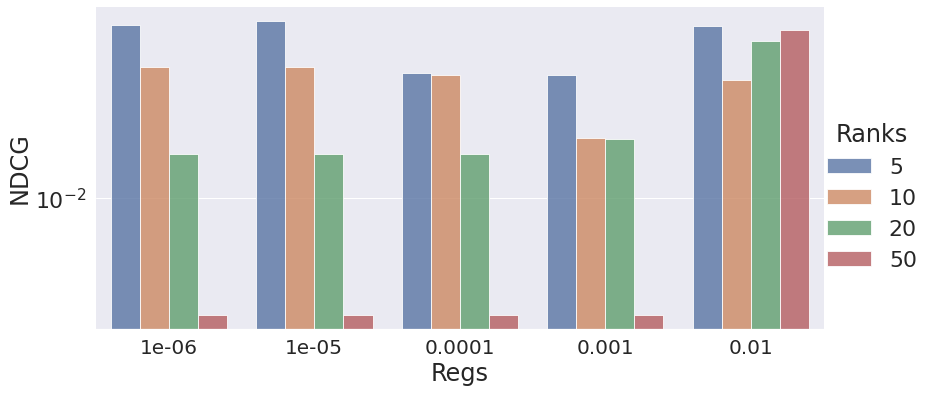

In [7]:
sns.set_theme(style="whitegrid")
sns.set(font_scale=2)

als_small_plt = sns.catplot(data=df_als_small, x='reg', y='NDCG', hue='rank', 
                                alpha=.8, kind='bar', height=6, legend_out=True, aspect=2);

als_small_plt.despine(left=True)
als_small_plt.set_axis_labels("Regs", "NDCG")
als_small_plt.legend.set_title("Ranks")
als_small_plt.set(yscale='log')
als_small_plt.set_xticklabels(fontsize=20)

## 1.2 Large

In [8]:
Map_als_large = [[7.457408053535433e-06, 1.6000423718409127e-05, 1.4692017997054323e-05, 8.89567004002874e-06, 1.4197597582019809e-05], [4.018316718852091e-05, 3.5887044882000796e-05, 3.30798127971301e-05, 1.3982607642986434e-05, 6.366218850648772e-05], [6.092822034476312e-05, 5.0316907679715865e-05, 9.086252741439778e-05, 0.00015274877526061555, 0.0006522720375593149], [0.00032008081255120263, 0.00027528981538117356, 0.0004451518837713404, 0.0007566966910415578, 0.004654606186722712]]
Precision_als_large = [[0.00014911463187325247, 0.00020503261882572228, 0.0002050326188257223, 0.00010251630941286118, 0.00020503261882572215], [0.0004939422180801492, 0.0004473438956197574, 0.0003727865796831313, 0.00041006523765144424, 0.0011929170549860207], [0.0010251630941286122, 0.0008014911463187324, 0.0012488350419384907, 0.0018173345759552653, 0.007968313140726936], [0.0035507921714818254, 0.0038117427772600197, 0.0053681267474370905, 0.009040074557315935, 0.03378378378378379]]
NDCG_als_large = [[0.00015388331008985706, 0.00022887366279954421, 0.00023093443558327192, 0.00012479077425857436, 0.00022794516977197397], [0.0005596477211671138, 0.0005047141982676375, 0.0004346058123586249, 0.0003785284892293814, 0.0012023005691489902], [0.0010620070199670137, 0.0008435155978934355, 0.0013708380838825809, 0.0020323677463886945, 0.008261598897747736], [0.004053693141321969, 0.004087765060168818, 0.00568351780135788, 0.0092599264188417, 0.037489354560712]]
Time_als_large = [[193.48267340660095, 24.589409828186035, 20.701823472976685, 125.44517421722412, 39.023515462875366], [150.148371219635, 97.56512880325317, 693.6780214309692, 71.69287347793579, 92.0856101512909], [17.50245213508606, 17.657140731811523, 42.41794943809509, 89.89999890327454, 62.23767828941345], [615.3937838077545, 205.0115089416504, 154.5751130580902, 118.9356541633606, 758.012672662735]]


In [9]:
als_large_result = []
for rank in range(len(ranks)):
  for reg in range(len(regs)):
    temp_lst = []
    temp_lst = [ranks[rank], regs[reg], Map_als_large[rank][reg], Precision_als_large[rank][reg], 
                NDCG_als_large[rank][reg], Time_als_large[rank][reg]]
    als_large_result.append(temp_lst)

df_als_large = pd.DataFrame(als_large_result)
df_als_large = df_als_large.rename(columns={0: "rank", 1: "reg", 2: "Map", 
                                            3: "Precision", 4: "NDCG", 5: "Time"})
df_als_large

,rank,reg,Map,Precision,NDCG,Time
0,5,0.000001,0.000007,0.000149,0.000154,193.482673
1,5,0.000010,0.000016,0.000205,0.000229,24.589410
2,5,0.000100,0.000015,0.000205,0.000231,20.701823
3,5,0.001000,0.000009,0.000103,0.000125,125.445174
4,5,0.010000,0.000014,0.000205,0.000228,39.023515
5,10,0.000001,0.000040,0.000494,0.000560,150.148371
6,10,0.000010,0.000036,0.000447,0.000505,97.565129
7,10,0.000100,0.000033,0.000373,0.000435,693.678021
8,10,0.001000,0.000014,0.000410,0.000379,71.692873
9,10,0.010000,0.000064,0.001193,0.001202,92.085610


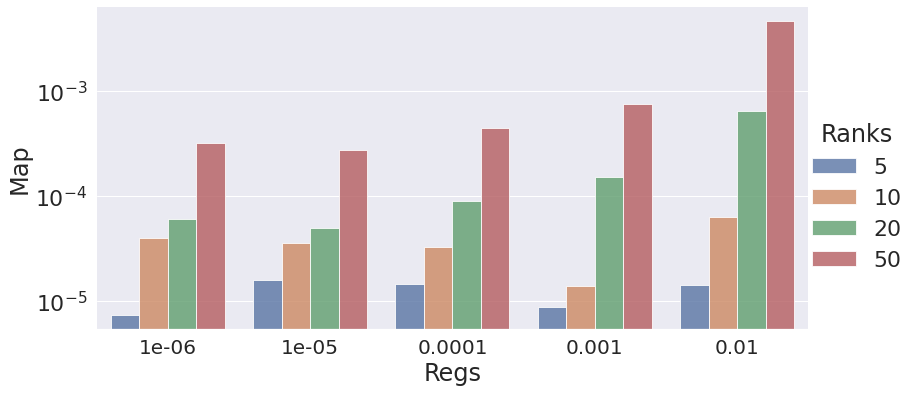

In [10]:
sns.set_theme(style="whitegrid")
sns.set(font_scale=2)

als_small_plt = sns.catplot(data=df_als_large, x='reg', y='Map', hue='rank', 
                                alpha=.8, kind='bar', height=6, legend_out=True, aspect=2);

als_small_plt.despine(left=True)
als_small_plt.set_axis_labels("Regs", "Map")
als_small_plt.legend.set_title("Ranks")
als_small_plt.set(yscale='log')
als_small_plt.set_xticklabels(fontsize=20)

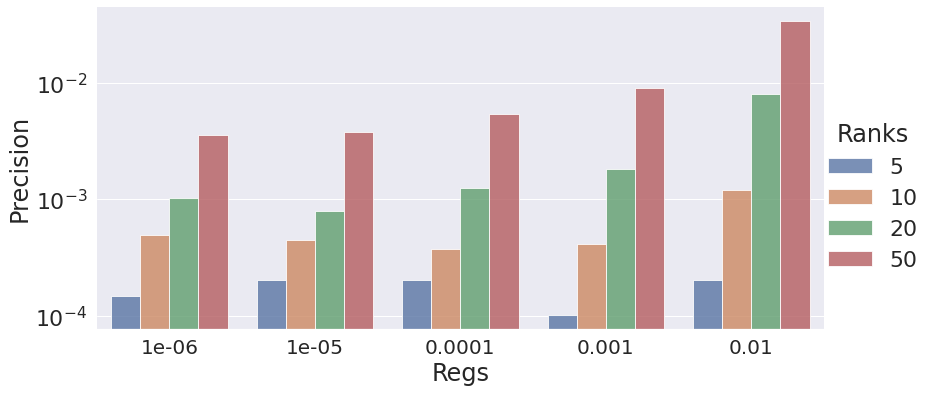

In [11]:
sns.set_theme(style="whitegrid")
sns.set(font_scale=2)

als_small_plt = sns.catplot(data=df_als_large, x='reg', y='Precision', hue='rank', 
                                alpha=.8, kind='bar', height=6, legend_out=True, aspect=2);

als_small_plt.despine(left=True)
als_small_plt.set_axis_labels("Regs", "Precision")
als_small_plt.legend.set_title("Ranks")
als_small_plt.set(yscale='log')
als_small_plt.set_xticklabels(fontsize=20)

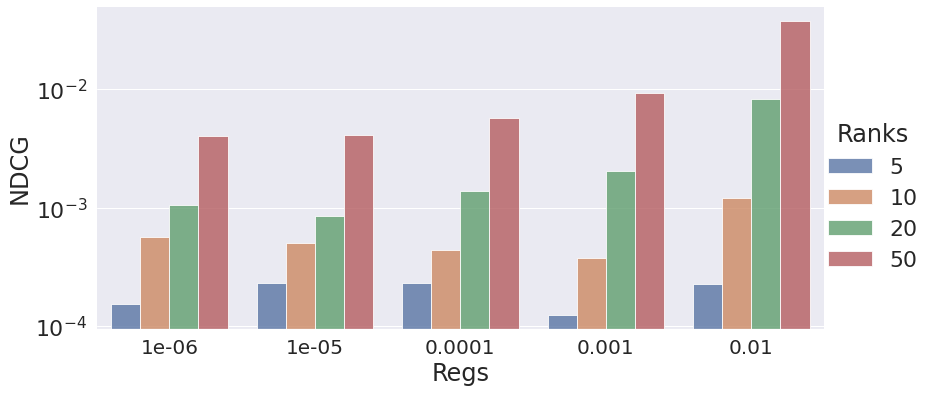

In [12]:
sns.set_theme(style="whitegrid")
sns.set(font_scale=2)

als_small_plt = sns.catplot(data=df_als_large, x='reg', y='NDCG', hue='rank', 
                                alpha=.8, kind='bar', height=6, legend_out=True, aspect=2);

als_small_plt.despine(left=True)
als_small_plt.set_axis_labels("Regs", "NDCG")
als_small_plt.legend.set_title("Ranks")
als_small_plt.set(yscale='log')
als_small_plt.set_xticklabels(fontsize=20)

# 2. Lightfm

In [13]:
lightfm_small = [[0.13333334, 0.120000005, 0.123333335, 0.12666667, 0.14], [0.14999999, 0.14999999, 0.13, 0.12666667, 0.14666666], [0.123333335, 0.12666667, 0.13, 0.13000001, 0.15333332], [0.13666667, 0.12666667, 0.14999999, 0.11333334, 0.14333333]]

In [14]:
lightfm_small_result = []
for rank in range(len(ranks)):
  for reg in range(len(regs)):
    temp_lst = []
    temp_lst = [ranks[rank], regs[reg], lightfm_small[rank][reg]]
    lightfm_small_result.append(temp_lst)

df_lightfm_small = pd.DataFrame(lightfm_small_result)
df_lightfm_small = df_lightfm_small.rename(columns={0: "rank", 1: "reg", 2: "PrecisionAt"})
df_lightfm_small

,rank,reg,PrecisionAt
0,5,0.000001,0.133333
1,5,0.000010,0.120000
2,5,0.000100,0.123333
3,5,0.001000,0.126667
4,5,0.010000,0.140000
5,10,0.000001,0.150000
6,10,0.000010,0.150000
7,10,0.000100,0.130000
8,10,0.001000,0.126667
9,10,0.010000,0.146667


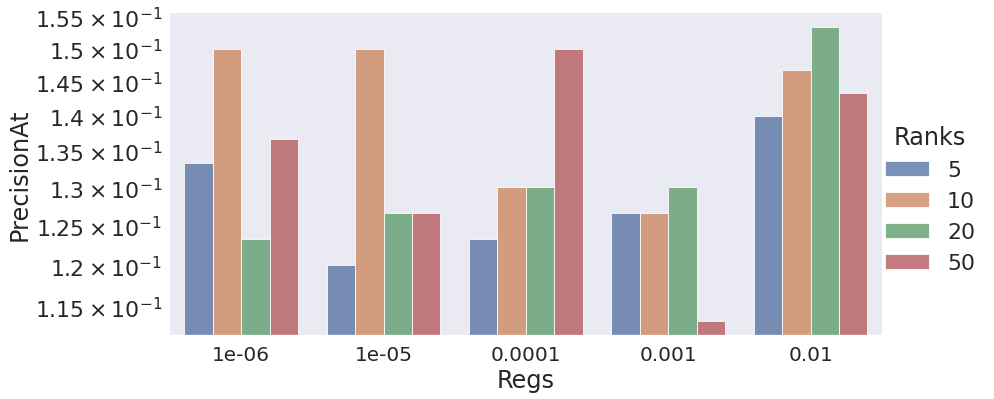

In [15]:
sns.set_theme(style="whitegrid")
sns.set(font_scale=2)

lightfm_small_plt = sns.catplot(data=df_lightfm_small, x='reg', y='PrecisionAt', hue='rank', 
                                alpha=.8, kind='bar', height=6, legend_out=True, aspect=2);

lightfm_small_plt.despine(left=True)
lightfm_small_plt.set_axis_labels("Regs", "PrecisionAt")
lightfm_small_plt.legend.set_title("Ranks")
lightfm_small_plt.set(yscale='log')
lightfm_small_plt.set_xticklabels(fontsize=20)

In [16]:
lightfm_large = [[0.26822713, 0.2684303, 0.27304706, 0.22722068, 0.12816252], [0.2881071, 0.28636196, 0.2901293, 0.22124654, 0.0007848569], [0.30344415, 0.3010157, 0.30287167, 0.210988, 0.00045244687], [0.3200831, 0.32048014, 0.3197507, 0.21082178, 0.0004893813]]

In [17]:
lightfm_large_result = []
for rank in range(len(ranks)):
  for reg in range(len(regs)):
    temp_lst = []
    temp_lst = [ranks[rank], regs[reg], lightfm_large[rank][reg]]
    lightfm_large_result.append(temp_lst)

df_lightfm_large = pd.DataFrame(lightfm_large_result)
df_lightfm_large = df_lightfm_large.rename(columns={0: "rank", 1: "reg", 2: "PrecisionAt"})
df_lightfm_large

,rank,reg,PrecisionAt
0,5,0.000001,0.268227
1,5,0.000010,0.268430
2,5,0.000100,0.273047
3,5,0.001000,0.227221
4,5,0.010000,0.128163
5,10,0.000001,0.288107
6,10,0.000010,0.286362
7,10,0.000100,0.290129
8,10,0.001000,0.221247
9,10,0.010000,0.000785


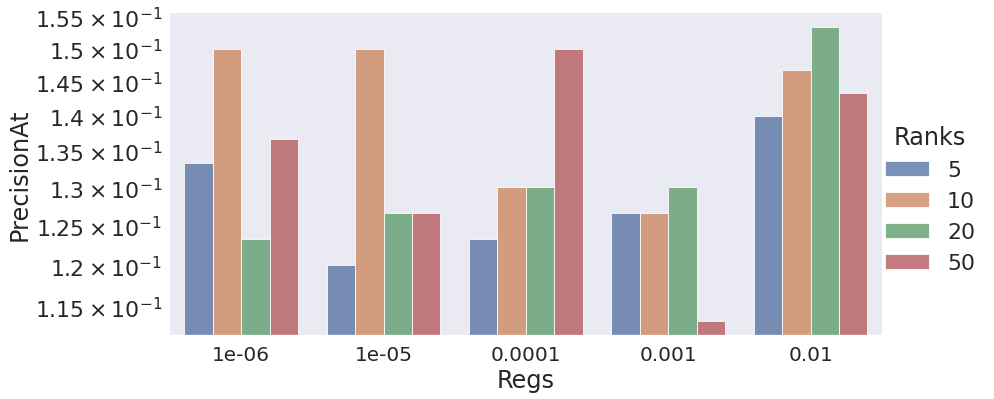

In [18]:
sns.set_theme(style="whitegrid")
sns.set(font_scale=2)

lightfm_large_plt = sns.catplot(data=df_lightfm_small, x='reg', y='PrecisionAt', hue='rank', 
                                alpha=.8, kind='bar', height=6, legend_out=True, aspect=2);

lightfm_large_plt.despine(left=True)
lightfm_large_plt.set_axis_labels("Regs", "PrecisionAt")
lightfm_large_plt.legend.set_title("Ranks")
lightfm_large_plt.set(yscale='log')
lightfm_large_plt.set_xticklabels(fontsize=20)

# 3. Time comparision

In [19]:
Time_als_small = [[16.76038384437561, 72.61697363853455, 15.036090850830078, 10.277924060821533, 9.653090476989746], [11.175248146057129, 12.739938974380493, 11.274507999420166, 9.078178882598877, 81.88284969329834], [10.38665246963501, 10.185670614242554, 11.341841459274292, 12.000884056091309, 14.347305297851562], [17.387662172317505, 16.417531967163086, 96.47444462776184, 12.373949527740479, 16.00629496574402]]
Time_als_large = [[193.48267340660095, 24.589409828186035, 20.701823472976685, 125.44517421722412, 39.023515462875366], [150.148371219635, 97.56512880325317, 693.6780214309692, 71.69287347793579, 92.0856101512909], [17.50245213508606, 17.657140731811523, 42.41794943809509, 89.89999890327454, 62.23767828941345], [615.3937838077545, 205.0115089416504, 154.5751130580902, 118.9356541633606, 758.012672662735]]
Time_lightfm_small = [[0.031111478805541992, 0.02721571922302246, 0.026635408401489258, 0.027491331100463867, 0.026525020599365234], [0.03656196594238281, 0.034011125564575195, 0.0336918830871582, 0.033754825592041016, 0.03207039833068848], [0.04717659950256348, 0.045538902282714844, 0.04599261283874512, 0.04769110679626465, 0.04748988151550293], [0.08908677101135254, 0.10708808898925781, 0.09122347831726074, 0.08632111549377441, 0.09117603302001953]]
Time_lightfm_large = [[13.677974939346313, 13.245295763015747, 13.213070631027222, 13.091648578643799, 13.705780982971191], [19.502789735794067, 19.240309715270996, 20.15175724029541,20.621191263198853, 21.52007246017456], [30.29228663444519, 29.71775531768799, 31.07072687149048, 27.586222410202026, 29.09500241279602], [52.065041303634644, 50.813910484313965, 50.36804270744324, 49.4209840297699, 47.666356563568115]]

In [20]:
time_result = []
result_name_list = ['Time_als_small', 'Time_als_large', 'Time_lightfm_small', 'Time_lightfm_large']
for name in result_name_list:
  for rank in range(len(ranks)):
    for reg in range(len(regs)):
      temp_lst = []
      if name == 'Time_als_small':
        temp_lst = [ranks[rank], regs[reg], Time_als_small[rank][reg], 'als_small']
        time_result.append(temp_lst)
      elif name == 'Time_als_large':
        temp_lst = [ranks[rank], regs[reg], Time_als_large[rank][reg], 'als_large']
        time_result.append(temp_lst)
      elif name == 'Time_lightfm_small':
        temp_lst = [ranks[rank], regs[reg], Time_lightfm_small[rank][reg], 'lightfm_small']
        time_result.append(temp_lst)
      elif name == 'Time_lightfm_large':
        temp_lst = [ranks[rank], regs[reg], Time_lightfm_large[rank][reg], 'lightfm_large']
        time_result.append(temp_lst)

time_result = pd.DataFrame(time_result)
time_result = time_result.rename(columns={0: "rank", 1: "reg", 2: "time", 3: "type"})
time_result

,rank,reg,time,type
0,5,0.000001,16.760384,als_small
1,5,0.000010,72.616974,als_small
2,5,0.000100,15.036091,als_small
3,5,0.001000,10.277924,als_small
4,5,0.010000,9.653090,als_small
...,...,...,...,...
75,50,0.000001,52.065041,lightfm_large
76,50,0.000010,50.813910,lightfm_large
77,50,0.000100,50.368043,lightfm_large
78,50,0.001000,49.420984,lightfm_large


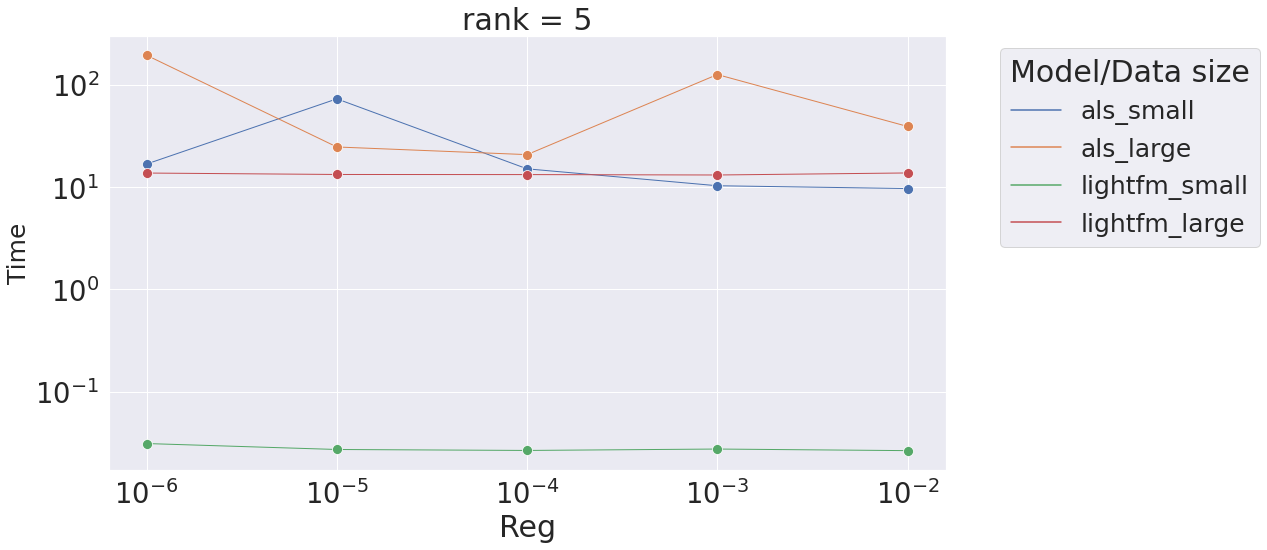

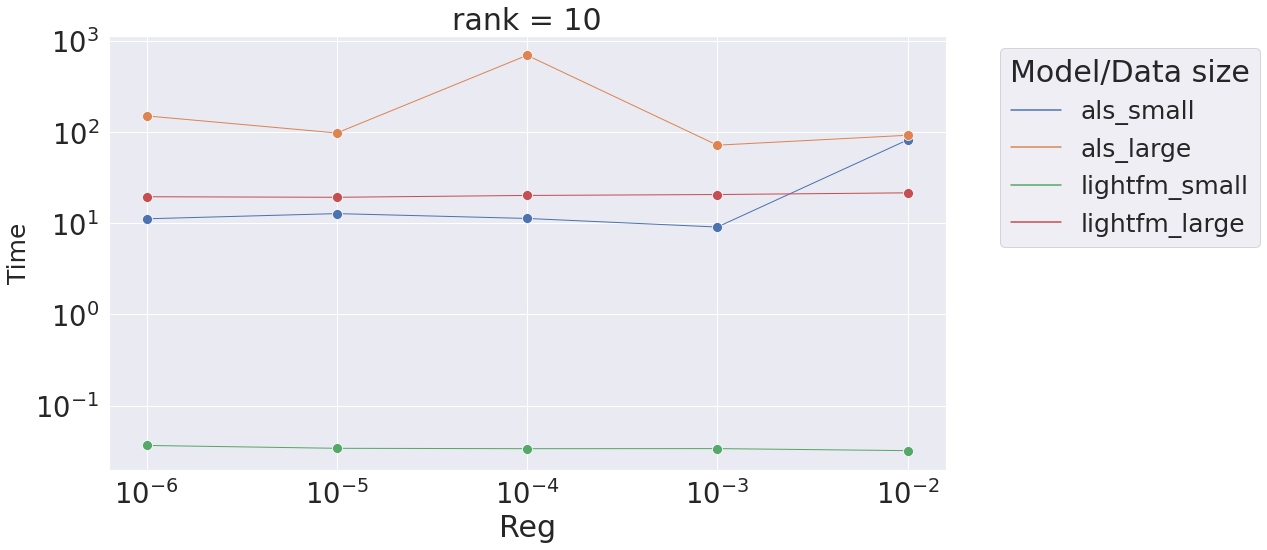

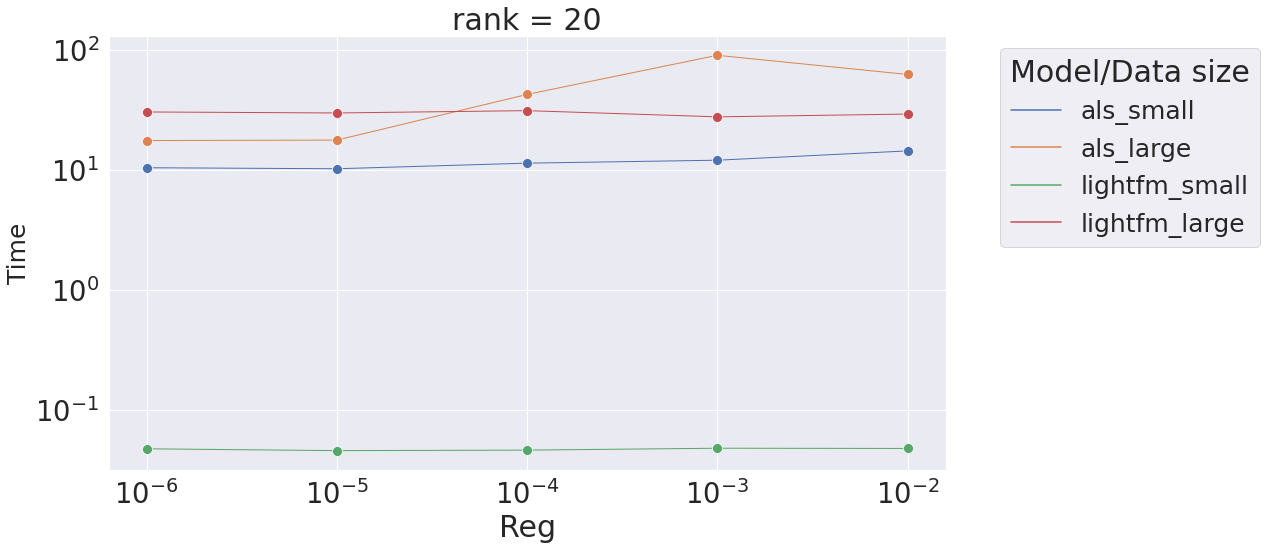

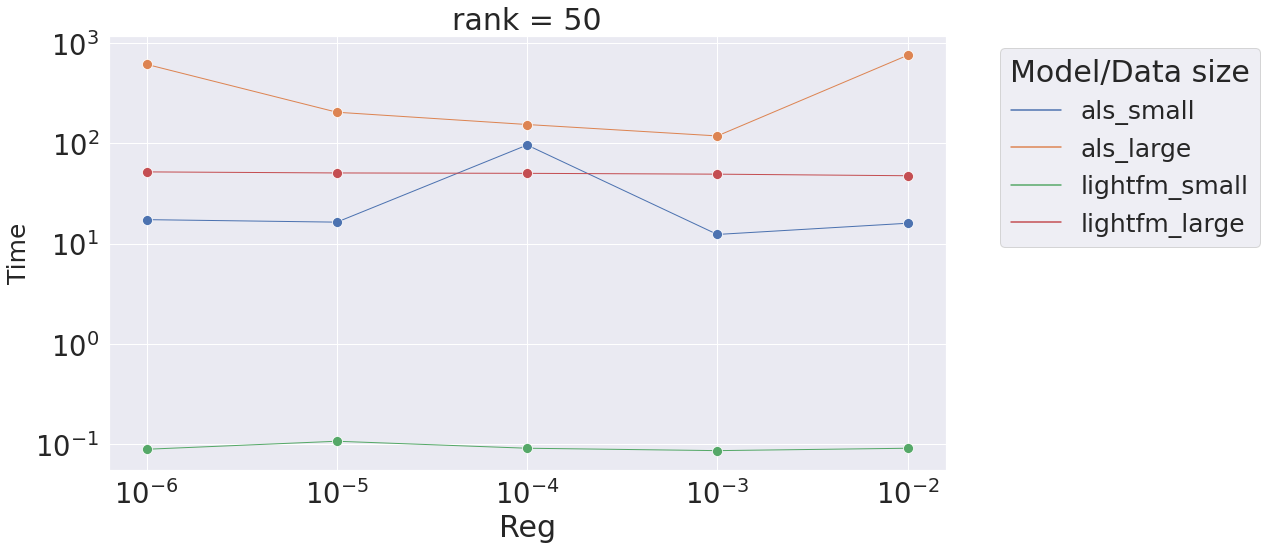

In [22]:
sns.set_theme(style="whitegrid")
sns.set(font_scale=2)

for i in ranks:
  plt.figure(figsize = (15,8))
  sns.set(font_scale = 2.5)
  
  time_plt = sns.lineplot(data=time_result[time_result['rank'] == i], x="reg", y="time", hue="type", estimator = None, markersize=10, linewidth = 1, marker="o")
  time_plt.set(title='rank = ' + str(i))
  time_plt.set_xlabel("Reg",fontsize=30)
  time_plt.set_ylabel("Time",fontsize=25)
  time_plt.set(xscale='log', yscale='log')
  time_plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize='25').set_title("Model/Data size")

# 4. Precision


In [23]:
Precision_als_small = [[0.04666666666666667, 0.049999999999999996, 0.036666666666666674, 0.03666666666666667, 0.05000000000000001], [0.030000000000000002, 0.03, 0.02666666666666667, 0.006666666666666667, 0.023333333333333334], [0.0033333333333333335, 0.0033333333333333335, 0.0033333333333333335, 0.006666666666666667, 0.03], [0.0033333333333333335, 0.0033333333333333335, 0.0033333333333333335, 0.0033333333333333335, 0.03666666666666667]]
Precision_als_large = [[0.00014911463187325247, 0.00020503261882572228, 0.0002050326188257223, 0.00010251630941286118, 0.00020503261882572215], [0.0004939422180801492, 0.0004473438956197574, 0.0003727865796831313, 0.00041006523765144424, 0.0011929170549860207], [0.0010251630941286122, 0.0008014911463187324, 0.0012488350419384907, 0.0018173345759552653, 0.007968313140726936], [0.0035507921714818254, 0.0038117427772600197, 0.0053681267474370905, 0.009040074557315935, 0.03378378378378379]]
lightfm_small = [[0.13333334, 0.120000005, 0.123333335, 0.12666667, 0.14], [0.14999999, 0.14999999, 0.13, 0.12666667, 0.14666666], [0.123333335, 0.12666667, 0.13, 0.13000001, 0.15333332], [0.13666667, 0.12666667, 0.14999999, 0.11333334, 0.14333333]]
lightfm_large = [[0.26822713, 0.2684303, 0.27304706, 0.22722068, 0.12816252], [0.2881071, 0.28636196, 0.2901293, 0.22124654, 0.0007848569], [0.30344415, 0.3010157, 0.30287167, 0.210988, 0.00045244687], [0.3200831, 0.32048014, 0.3197507, 0.21082178, 0.0004893813]]

In [24]:
precision_result = []
result_name_list = ['Precision_als_small', 'Precision_als_large', 'lightfm_small', 'lightfm_large']
for name in result_name_list:
  for rank in range(len(ranks)):
    for reg in range(len(regs)):
      temp_lst = []
      if name == 'Precision_als_small':
        temp_lst = [ranks[rank], regs[reg], Precision_als_small[rank][reg], 'als_small']
        precision_result.append(temp_lst)
      elif name == 'Precision_als_large':
        temp_lst = [ranks[rank], regs[reg], Precision_als_large[rank][reg], 'als_large']
        precision_result.append(temp_lst)
      elif name == 'lightfm_small':
        temp_lst = [ranks[rank], regs[reg], lightfm_small[rank][reg], 'lightfm_small']
        precision_result.append(temp_lst)
      elif name == 'lightfm_large':
        temp_lst = [ranks[rank], regs[reg], lightfm_large[rank][reg], 'lightfm_large']
        precision_result.append(temp_lst)

precision_result = pd.DataFrame(precision_result)
precision_result = precision_result.rename(columns={0: "rank", 1: "reg", 2: "precision", 3: "type"})
precision_result

,rank,reg,precision,type
0,5,0.000001,0.046667,als_small
1,5,0.000010,0.050000,als_small
2,5,0.000100,0.036667,als_small
3,5,0.001000,0.036667,als_small
4,5,0.010000,0.050000,als_small
...,...,...,...,...
75,50,0.000001,0.320083,lightfm_large
76,50,0.000010,0.320480,lightfm_large
77,50,0.000100,0.319751,lightfm_large
78,50,0.001000,0.210822,lightfm_large


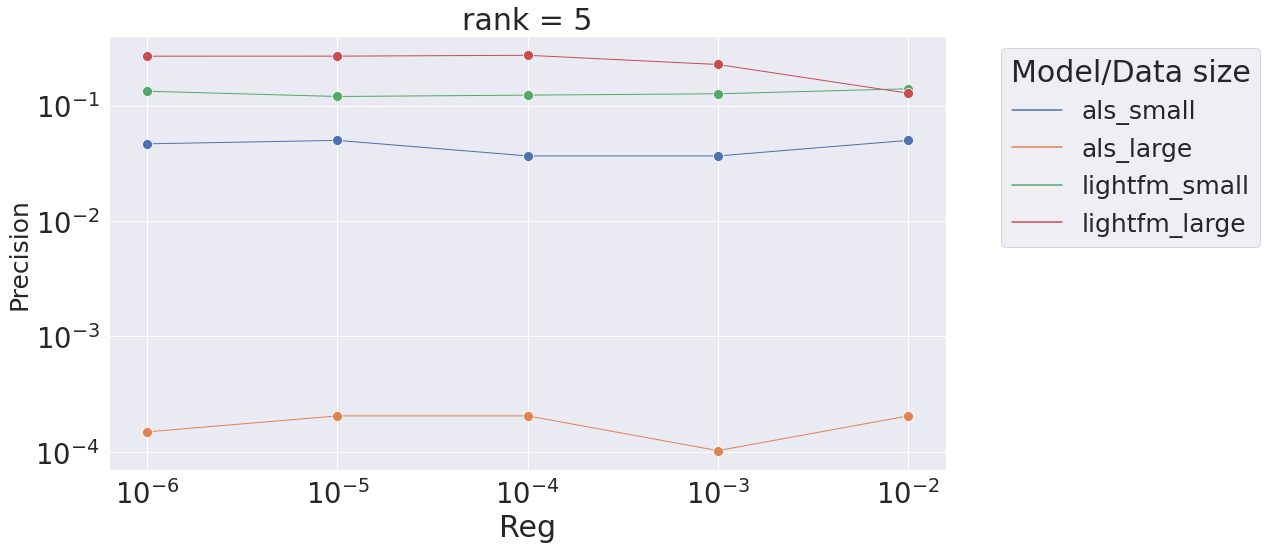

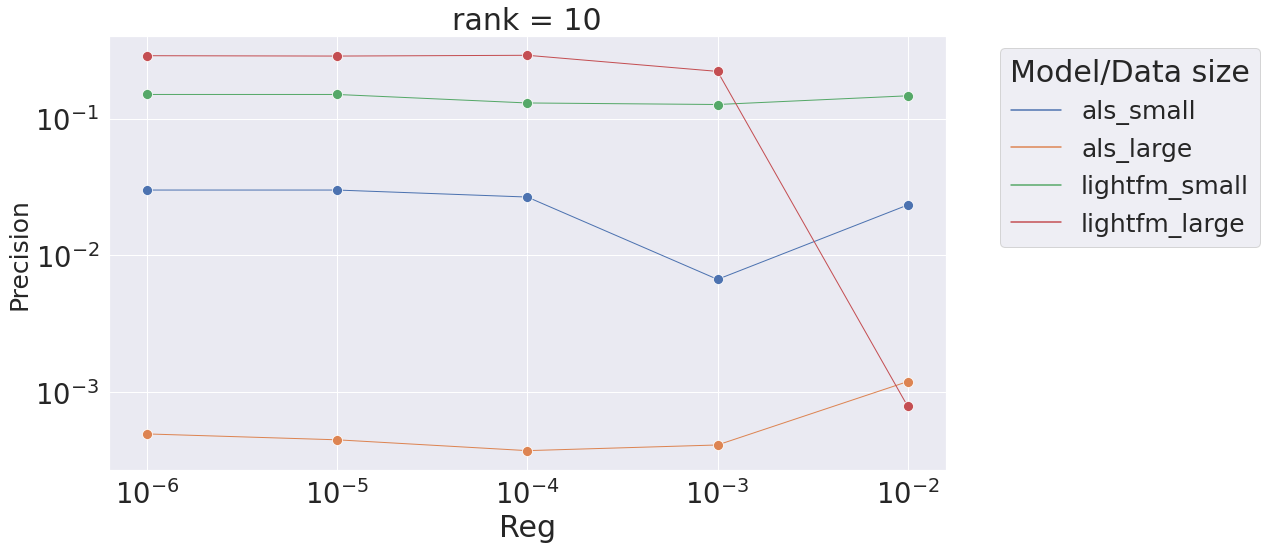

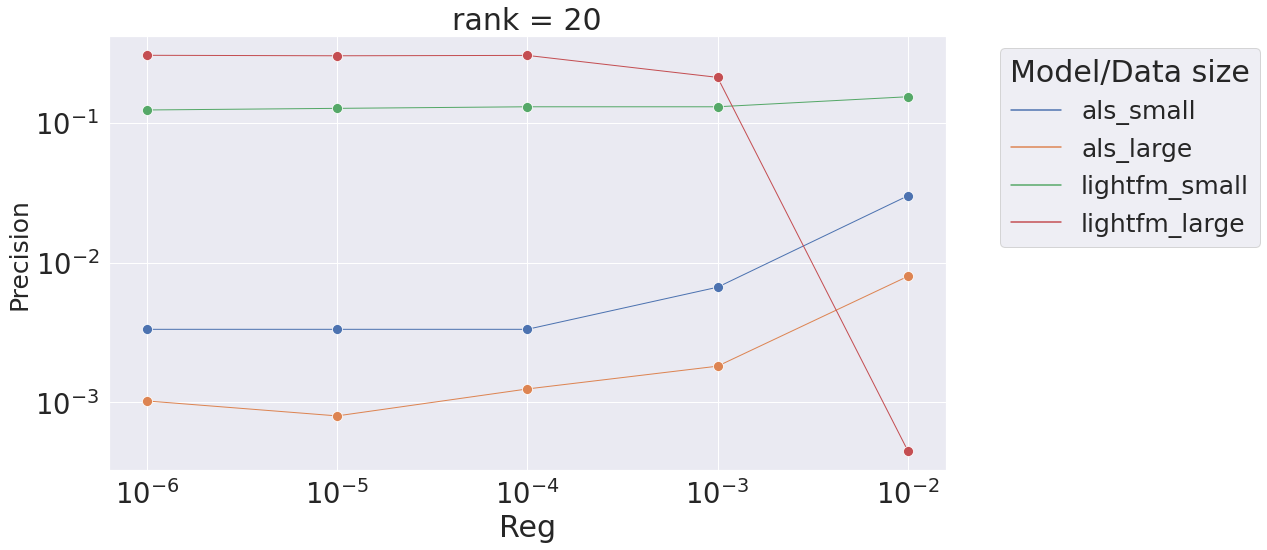

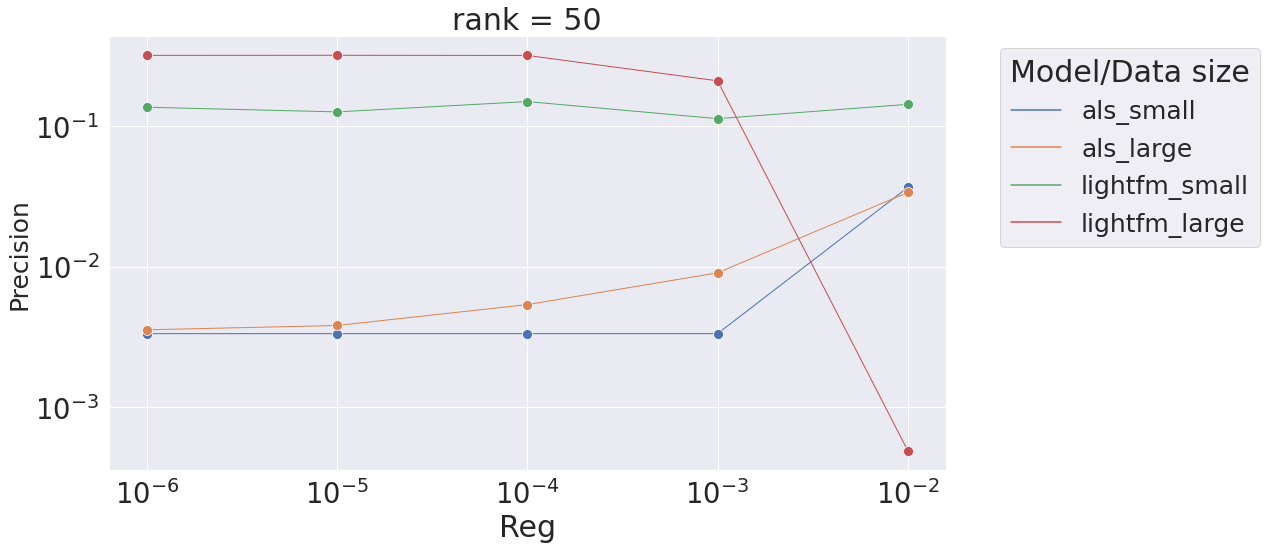

In [25]:
sns.set_theme(style="whitegrid")
sns.set(font_scale=2)

for i in ranks:
  plt.figure(figsize = (15,8))
  sns.set(font_scale = 2.5)
  
  time_plt = sns.lineplot(data=precision_result[precision_result['rank'] == i], x="reg", y="precision", hue="type", estimator = None, markersize=10, linewidth = 1, marker="o")
  time_plt.set(title='rank = ' + str(i))
  time_plt.set_xlabel("Reg",fontsize=30)
  time_plt.set_ylabel("Precision",fontsize=25)
  time_plt.set(xscale='log', yscale='log')
  time_plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize='25').set_title("Model/Data size")